# Business Case Study: Audiobook app

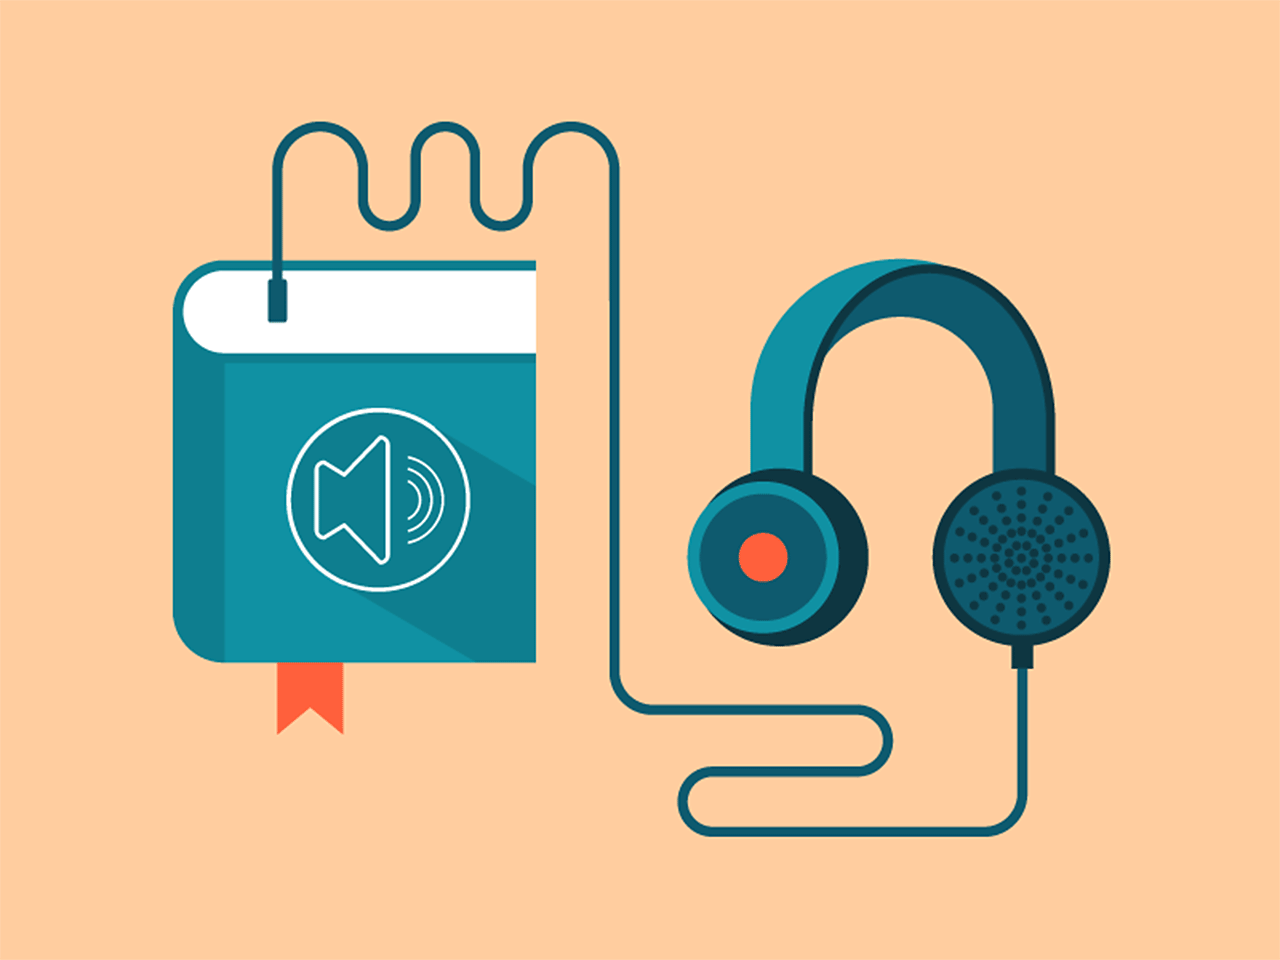

You are given data from an Audiobook app. Logically, it relates only to the audio versions of books.  We want to create a machine learning model based on our available data that can predict if a customer will buy again from the Audiobook company.

- The data is from an audiobook app, each customer in the database has make a purchase at least once.
- The main idea is that the company shouldn't spend there money targeting individuals who are unlikely to come back.
- If we focus on client who are more likely to convert again we'll get increase the sales and profitability figures.

The model must show us which are the most important metrics for a client to come back.

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

plt.style.use('seaborn')

%matplotlib inline
sns.set_style("whitegrid")

pd.set_option("display.max_columns", 80)
pd.set_option("display.max_rows", 80)
pd.set_option("display.float_format", "{:.2f}".format)

In [3]:
data = pd.read_csv("audiobook_data_2.csv", index_col=0)
data.head()

,Book_length(mins)_overall,Book_length(mins)_avg,Price_overall,Price_avg,Review,Review10/10,Completion,Minutes_listened,Support_Request,Last_Visited_mins_Purchase_date,Target
994,1620.00,1620,19.73,19.73,1,10.00,0.99,1603.80,5,92,0
1143,2160.00,2160,5.33,5.33,0,8.91,0.00,0.00,0,0,0
2059,2160.00,2160,5.33,5.33,0,8.91,0.00,0.00,0,388,0
2882,1620.00,1620,5.96,5.96,0,8.91,0.42,680.40,1,129,0
3342,2160.00,2160,5.33,5.33,0,8.91,0.22,475.20,0,361,0


In [4]:
count = (data['Review']).value_counts()[0]
print("Number of users who didnt give reviews are : ", count, " out of 14084")

Number of users who didnt give reviews are :  11820  out of 14084


# 1. Getting aquainted with the dataset

- `ÌD`: is like a name.

- `Book_length(mins)_overall`: is the sum of the lengths of purchases.

- `Book_length(mins)_avg`: is the sum of the lengths of purchases divided by the number of purchases. Notice we don't need the number of purchases column because we ca get it from `Book_length(mins)_overall` / `Book_length(mins)_avg`.

- `Price_overall` & `Price_avg`: Same as Book length, the price variable is almost always a good predictor.

- `Review`: is boolean. It shows if the customer left a review. If so, `Review10/10` saves the review left by the user. While most users don't left a review we fill the missing reviews by avrage review column.

- `Minutes_listened`: is a measure of engagement, the total of minutes the user listen to audiobooks.

- `Completion`: is the `Minutes_listened` / `Book_length(mins)_overall`.

- `Support_Request`: Shows the total number of support request (forgotten password to assistance).

- `Last_Visited_mins_Purchase_date`: the bigger the difference, the bigger sooner the engagement. If the value is 0, we are sure the customer has never accessed what he/she has bought.

The data was gathered from the audiobook app, the input data represents `2 years` worth of engagement. We are doing supervised learning so we need `target`. We took extra `6 month` to check if the user converted or not. 1 if the customer buys in the next 6 months, 0 if the customer didn't.

- `target`: 1 if the customer bought again in the last 6 months of data. 0 if the customer did not buy again.

# 2. Exploratory Data Analysis

In [5]:
data.describe()

,Book_length(mins)_overall,Book_length(mins)_avg,Price_overall,Price_avg,Review,Review10/10,Completion,Minutes_listened,Support_Request,Last_Visited_mins_Purchase_date,Target
count,14084.00,14084.00,14084.00,14084.00,14084.00,14084.00,14084.00,14084.00,14084.00,14084.00,14084.00
mean,1591.28,1678.61,7.10,7.54,0.16,8.91,0.13,189.89,0.07,61.94,0.16
std,504.34,654.84,4.93,5.56,0.37,0.64,0.24,371.08,0.47,88.21,0.37
min,216.00,216.00,3.86,3.86,0.00,1.00,0.00,0.00,0.00,0.00,0.00
25%,1188.00,1188.00,5.33,5.33,0.00,8.91,0.00,0.00,0.00,0.00,0.00
50%,1620.00,1620.00,5.95,6.07,0.00,8.91,0.00,0.00,0.00,11.00,0.00
75%,2160.00,2160.00,8.00,8.00,0.00,8.91,0.13,194.40,0.00,105.00,0.00
max,2160.00,7020.00,130.94,130.94,1.00,10.00,1.00,2160.00,30.00,464.00,1.00


In [6]:
data.isnull().sum()

Book_length(mins)_overall          0
Book_length(mins)_avg              0
Price_overall                      0
Price_avg                          0
Review                             0
Review10/10                        0
Completion                         0
Minutes_listened                   0
Support_Request                    0
Last_Visited_mins_Purchase_date    0
Target                             0
dtype: int64

### data.info()

## `Book_length(mins)_overall` & `Book_length(mins)_avg`

- `Book_length(mins)_overall`: is the sum of the lengths of purchases.

- `Book_length(mins)_avg`: is the sum of the lengths of purchases divided by the number of purchases. Notice we don't need the number of purchases column because we ca get it from `Book_length(mins)_overall` / `Book_length(mins)_avg`.

In [7]:
data['Book_length(mins)_overall'].value_counts()

2160.00    4712
1620.00    4149
1188.00    2851
648.00      712
1080.00     567
324.00      300
540.00      115
1404.00     112
1890.00     110
1674.00      98
1134.00      52
216.00       51
1656.00      27
1476.00      23
1350.00      21
756.00       21
918.00       15
1332.00      14
1242.00      13
864.00       13
1296.00      10
1152.00       8
972.00        7
1116.00       7
486.00        6
1377.00       5
1512.00       5
1368.00       5
1224.00       5
594.00        4
432.00        4
1044.00       4
702.00        3
684.00        3
1008.00       3
576.00        2
1161.00       2
504.00        2
1269.00       2
999.00        1
928.80        1
720.00        1
1098.00       1
1252.80       1
1062.00       1
1339.20       1
378.00        1
990.00        1
270.00        1
1260.00       1
612.00        1
1431.00       1
945.00        1
810.00        1
1440.00       1
1058.40       1
828.00        1
1170.00       1
1231.20       1
1002.86       1
Name: Book_length(mins)_overall, dtype: 

In [8]:
def book_length(length):
    if length > 1200:
        return 1
    else:
        return 0
    
data['purchases_hour_>3h'] = data['Book_length(mins)_overall'].apply(book_length)

In [9]:
data['Book_length(mins)_avg'].apply(book_length).value_counts()

1    9480
0    4604
Name: Book_length(mins)_avg, dtype: int64

In [10]:
data['purchases_hour_>3h'].value_counts()

1    9317
0    4767
Name: purchases_hour_>3h, dtype: int64

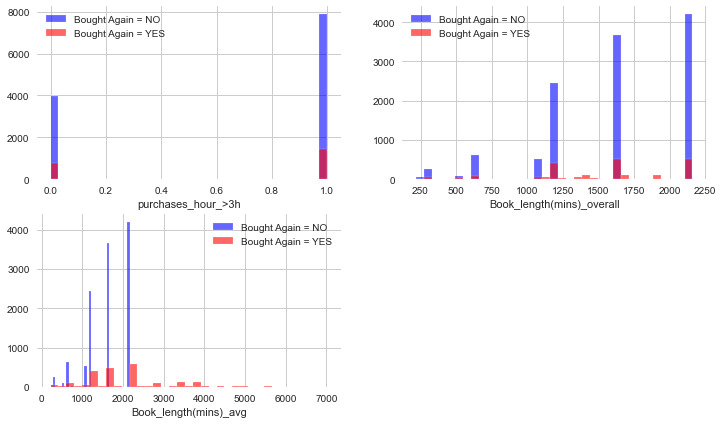

In [11]:
columns = ['purchases_hour_>3h', 'Book_length(mins)_overall', 'Book_length(mins)_avg']
plt.figure(figsize=(12, 7))

for i, column in enumerate(columns, 1):
    plt.subplot(2, 2, i)
    data[data["Target"] == 0][column].hist(bins=35, color='blue', label='Bought Again = NO', alpha=0.6)
    data[data["Target"] == 1][column].hist(bins=35, color='red', label='Bought Again = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

## `Price_overall` & `Price_avg`

- `Price_overall` & `Price_avg`: Same as Book length, the price variable is almost always a good predictor.

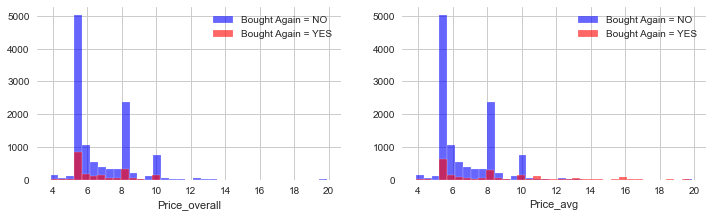

In [12]:
columns = ["Price_overall", "Price_avg"]
plt.figure(figsize=(12, 7))
df = data[(data.Price_overall < 20) & (data.Price_avg < 20)]

for i, column in enumerate(columns, 1):
    plt.subplot(2, 2, i)
    df[df["Target"] == 0][column].hist(bins=35, color='blue', label='Bought Again = NO', alpha=0.6)
    df[df["Target"] == 1][column].hist(bins=35, color='red', label='Bought Again = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

## `Review` & `Review10/10`
- `Review`: is boolean. It shows if the customer left a review. If so, `Review10/10` saves the review left by the user. While most users don't left a review we fill the missing reviews by avrage review column.

In [13]:
print(data[data['Review'] == 0].Target.value_counts(normalize=True))
print(data[data['Review'] == 1].Target.value_counts(normalize=True))

0   0.84
1   0.16
Name: Target, dtype: float64
0   0.83
1   0.17
Name: Target, dtype: float64


In [14]:
data['Review10/10'].value_counts()

8.91     11616
10.00     1284
8.00       404
9.00       381
7.00       157
6.00       104
5.00        43
9.50        21
4.00        18
8.50        11
1.00        10
3.00         9
2.00         7
6.50         5
7.50         2
8.33         2
5.50         2
8.67         2
4.50         1
7.75         1
9.40         1
9.67         1
6.67         1
1.50         1
Name: Review10/10, dtype: int64

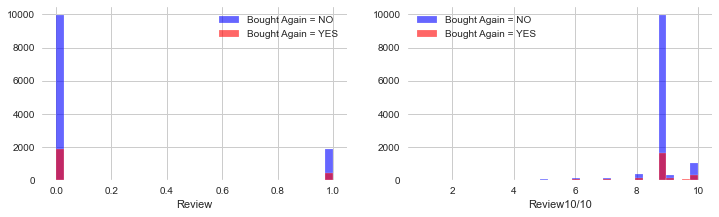

In [15]:
columns = ["Review", "Review10/10"]
plt.figure(figsize=(12, 7))

for i, column in enumerate(columns, 1):
    plt.subplot(2, 2, i)
    data[data["Target"] == 0][column].hist(bins=35, color='blue', label='Bought Again = NO', alpha=0.6)
    data[data["Target"] == 1][column].hist(bins=35, color='red', label='Bought Again = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

## `Minutes_listened` & `Completion`
- `Minutes_listened`: is a measure of engagement, the total of minutes the user listen to audiobooks.
- `Completion`: is the `Minutes_listened` / `Book_length(mins)_overall`.

In [16]:
def listened_to_books(minutes):
    if minutes > 0.0:
        return 0
    else:
        return 1
data['listened_to_books'] = data.Minutes_listened.apply(listened_to_books)

In [17]:
def completion_state(minutes):
    if minutes > 0.5:
        return 1
    else:
        return 0
data['completion_state'] = data.Completion.apply(completion_state)

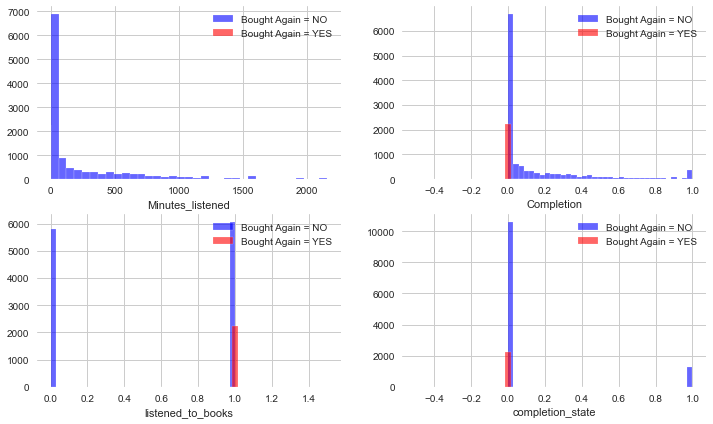

In [18]:
columns = ["Minutes_listened", "Completion", "listened_to_books", "completion_state"]
plt.figure(figsize=(12, 7))

for i, column in enumerate(columns, 1):
    plt.subplot(2, 2, i)
    data[data["Target"] == 0][column].hist(bins=35, color='blue', label='Bought Again = NO', alpha=0.6)
    data[data["Target"] == 1][column].hist(bins=35, color='red', label='Bought Again = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

In [19]:
data.drop('Minutes_listened', axis=1, inplace=True)

## `Support_Request` & `Last_Visited_mins_Purchase_date`

- `Support_Request`: Shows the total number of support request (forgotten password to assistance).
- `Last_Visited_mins_Purchase_date`: the bigger the difference, the bigger sooner the engagement. If the value is 0, we are sure the customer has never accessed what he/she has bought.

In [20]:
def asked_for_request(request):
    if request == 0:
        return 0
    else:
        return 1
    
data["asked_for_request"] = data.Support_Request.apply(asked_for_request)

In [21]:
def acc_purchases(purchase):
    if purchase == 0:
        return 0
    else:
        return 1
data['acc_purchases'] = data.Last_Visited_mins_Purchase_date.apply(acc_purchases)

In [22]:
data.Last_Visited_mins_Purchase_date.value_counts()

0      5493
1       357
2       198
3       165
5       140
       ... 
369       1
464       1
368       1
328       1
383       1
Name: Last_Visited_mins_Purchase_date, Length: 371, dtype: int64

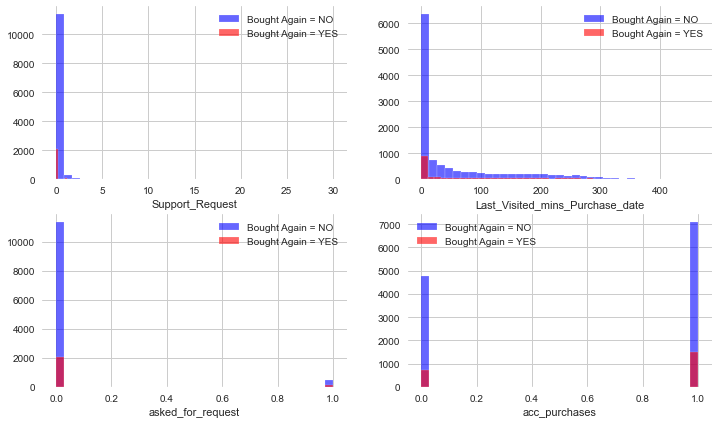

In [23]:
columns = ["Support_Request", "Last_Visited_mins_Purchase_date", "asked_for_request", "acc_purchases"]
plt.figure(figsize=(12, 7))

for i, column in enumerate(columns, 1):
    plt.subplot(2, 2, i)
    data[data["Target"] == 0][column].hist(bins=35, color='blue', label='Bought Again = NO', alpha=0.6)
    data[data["Target"] == 1][column].hist(bins=35, color='red', label='Bought Again = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

In [24]:
data.drop('Support_Request', axis=1, inplace=True)

In [25]:
print(f"{data.Target.value_counts()}")
print(f"{data.Target.value_counts()[0] / data.Target.value_counts()[1]}")

0    11847
1     2237
Name: Target, dtype: int64
5.295932051855163


It is important to notice that our `target` variable is inbabalanced. We have only `2237` user who convert again in the `6 month` period. The data need to be balanced.

<AxesSubplot:>

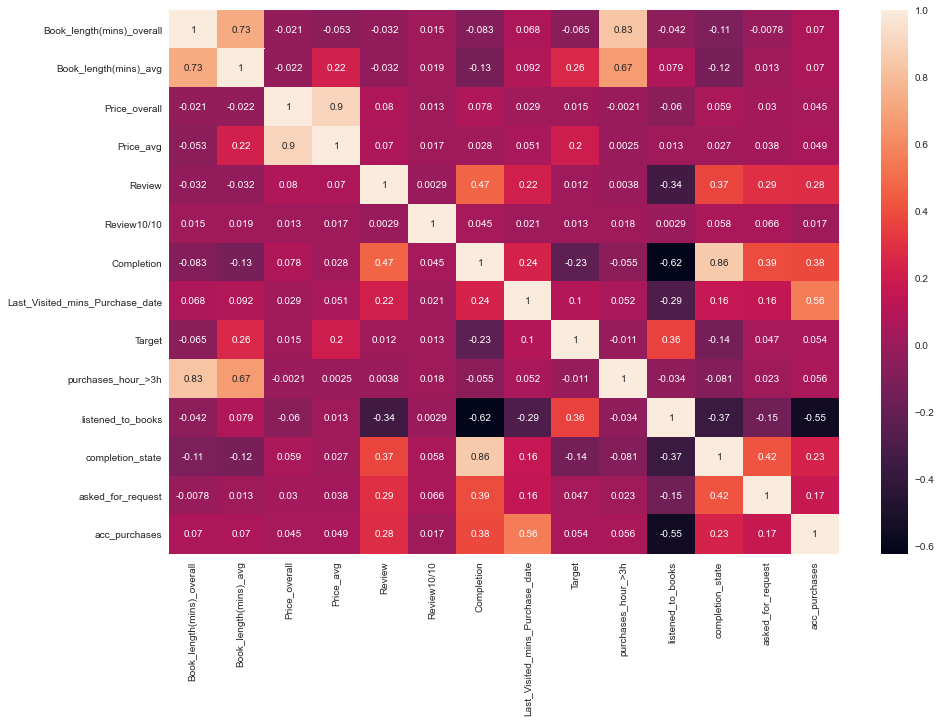

In [26]:
plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(), annot=True)

# 3. Data Pre-processing

Since we are dealing with real life data, we will need to preprocess it a bit. This is the relevant code which is not that hard but refers to data engineering more than machine learning.

- Balance the dataset. 
- Standardising 
- Shuffling 
- Splitting 

### Loading data

In [27]:
r_data = pd.read_csv("audiobook_data_2.csv", index_col=0)


### Removing duplicates

In [28]:
print(f"Data shape before removing duplicates: {r_data.shape}")

# Remove duplicate Features
r_data = r_data.T.drop_duplicates()
r_data = r_data.T

# Remove Duplicate Rows
r_data.drop_duplicates(inplace=True)

print(f"Data shape after removing duplicates: {r_data.shape}")

Data shape before removing duplicates: (14084, 11)
Data shape after removing duplicates: (9350, 11)


In [29]:
X = r_data.loc[:, r_data.columns != 'Target']
y = r_data.loc[:, r_data.columns == 'Target']

raw_csv_data = np.loadtxt('audiobook_data_2.csv', delimiter = ',', skiprows=1)

unscaled_inputs_all = raw_csv_data[:,1:-1]

targets_all = raw_csv_data[:,-1]
raw_csv_data

array([[9.9400e+02, 1.6200e+03, 1.6200e+03, ..., 5.0000e+00, 9.2000e+01,
        0.0000e+00],
       [1.1430e+03, 2.1600e+03, 2.1600e+03, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [2.0590e+03, 2.1600e+03, 2.1600e+03, ..., 0.0000e+00, 3.8800e+02,
        0.0000e+00],
       ...,
       [3.1134e+04, 2.1600e+03, 2.1600e+03, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [3.2832e+04, 1.6200e+03, 1.6200e+03, ..., 0.0000e+00, 9.0000e+01,
        0.0000e+00],
       [2.5100e+02, 1.6740e+03, 3.3480e+03, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00]])

## Pair-Wise Coorelation with each other 

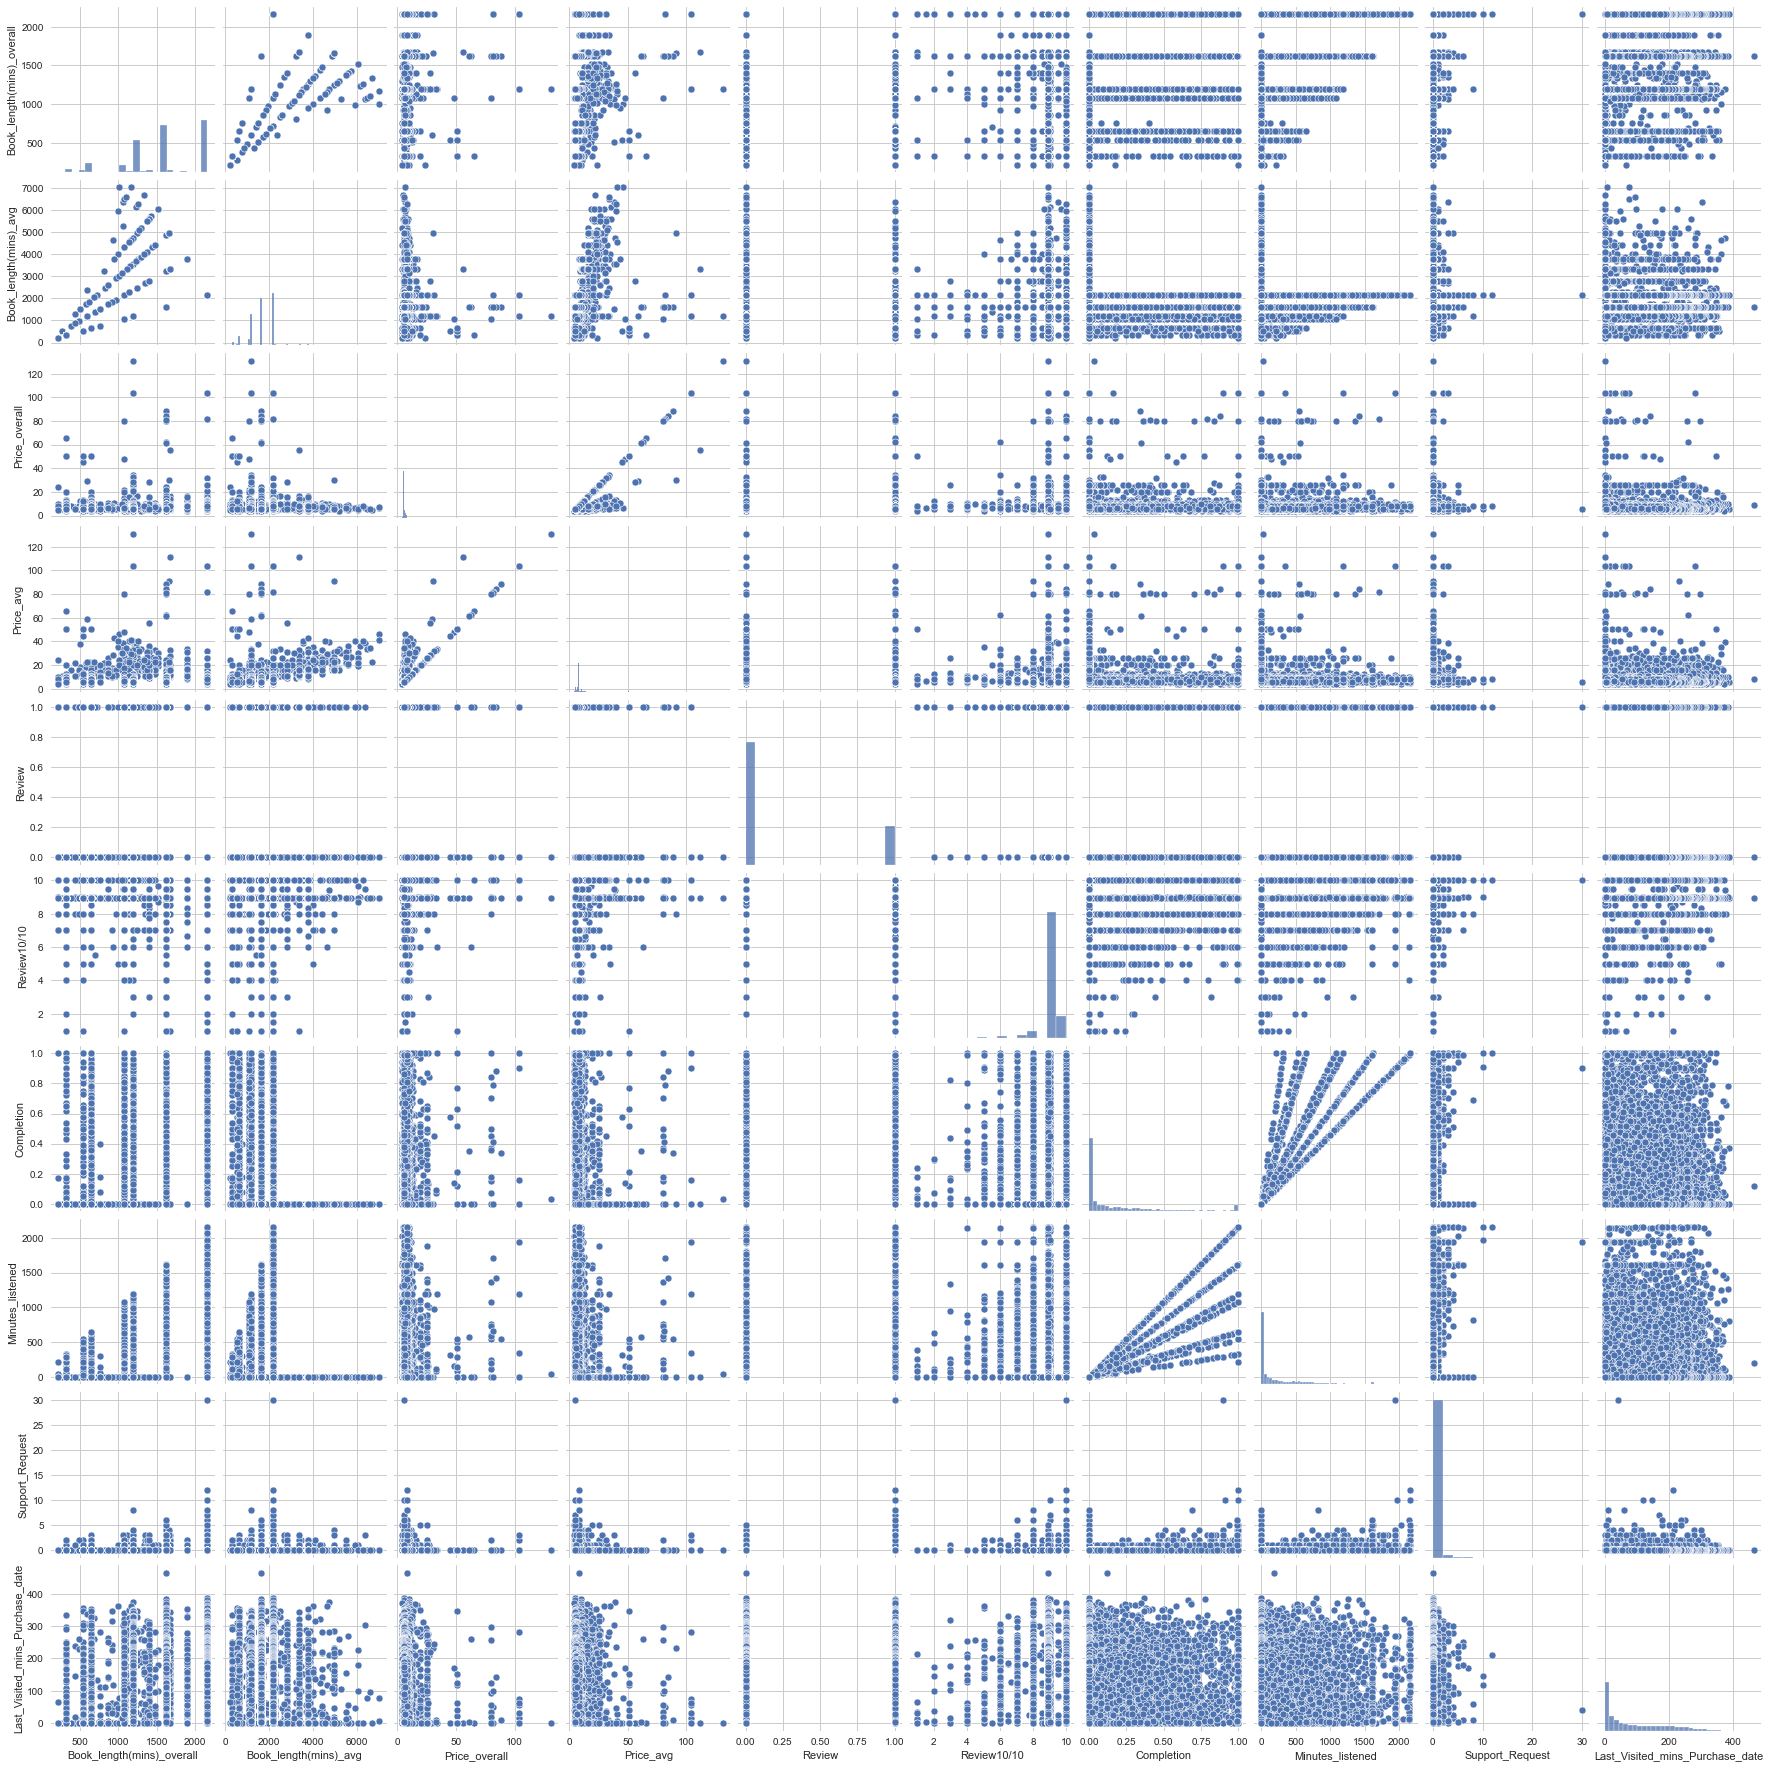

In [30]:
sns.pairplot(r_data.iloc[:,0:10])


## Pair-Wise Coorelation with each other aspects to our Target variable

C:\Users\ashwi\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\ashwi\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


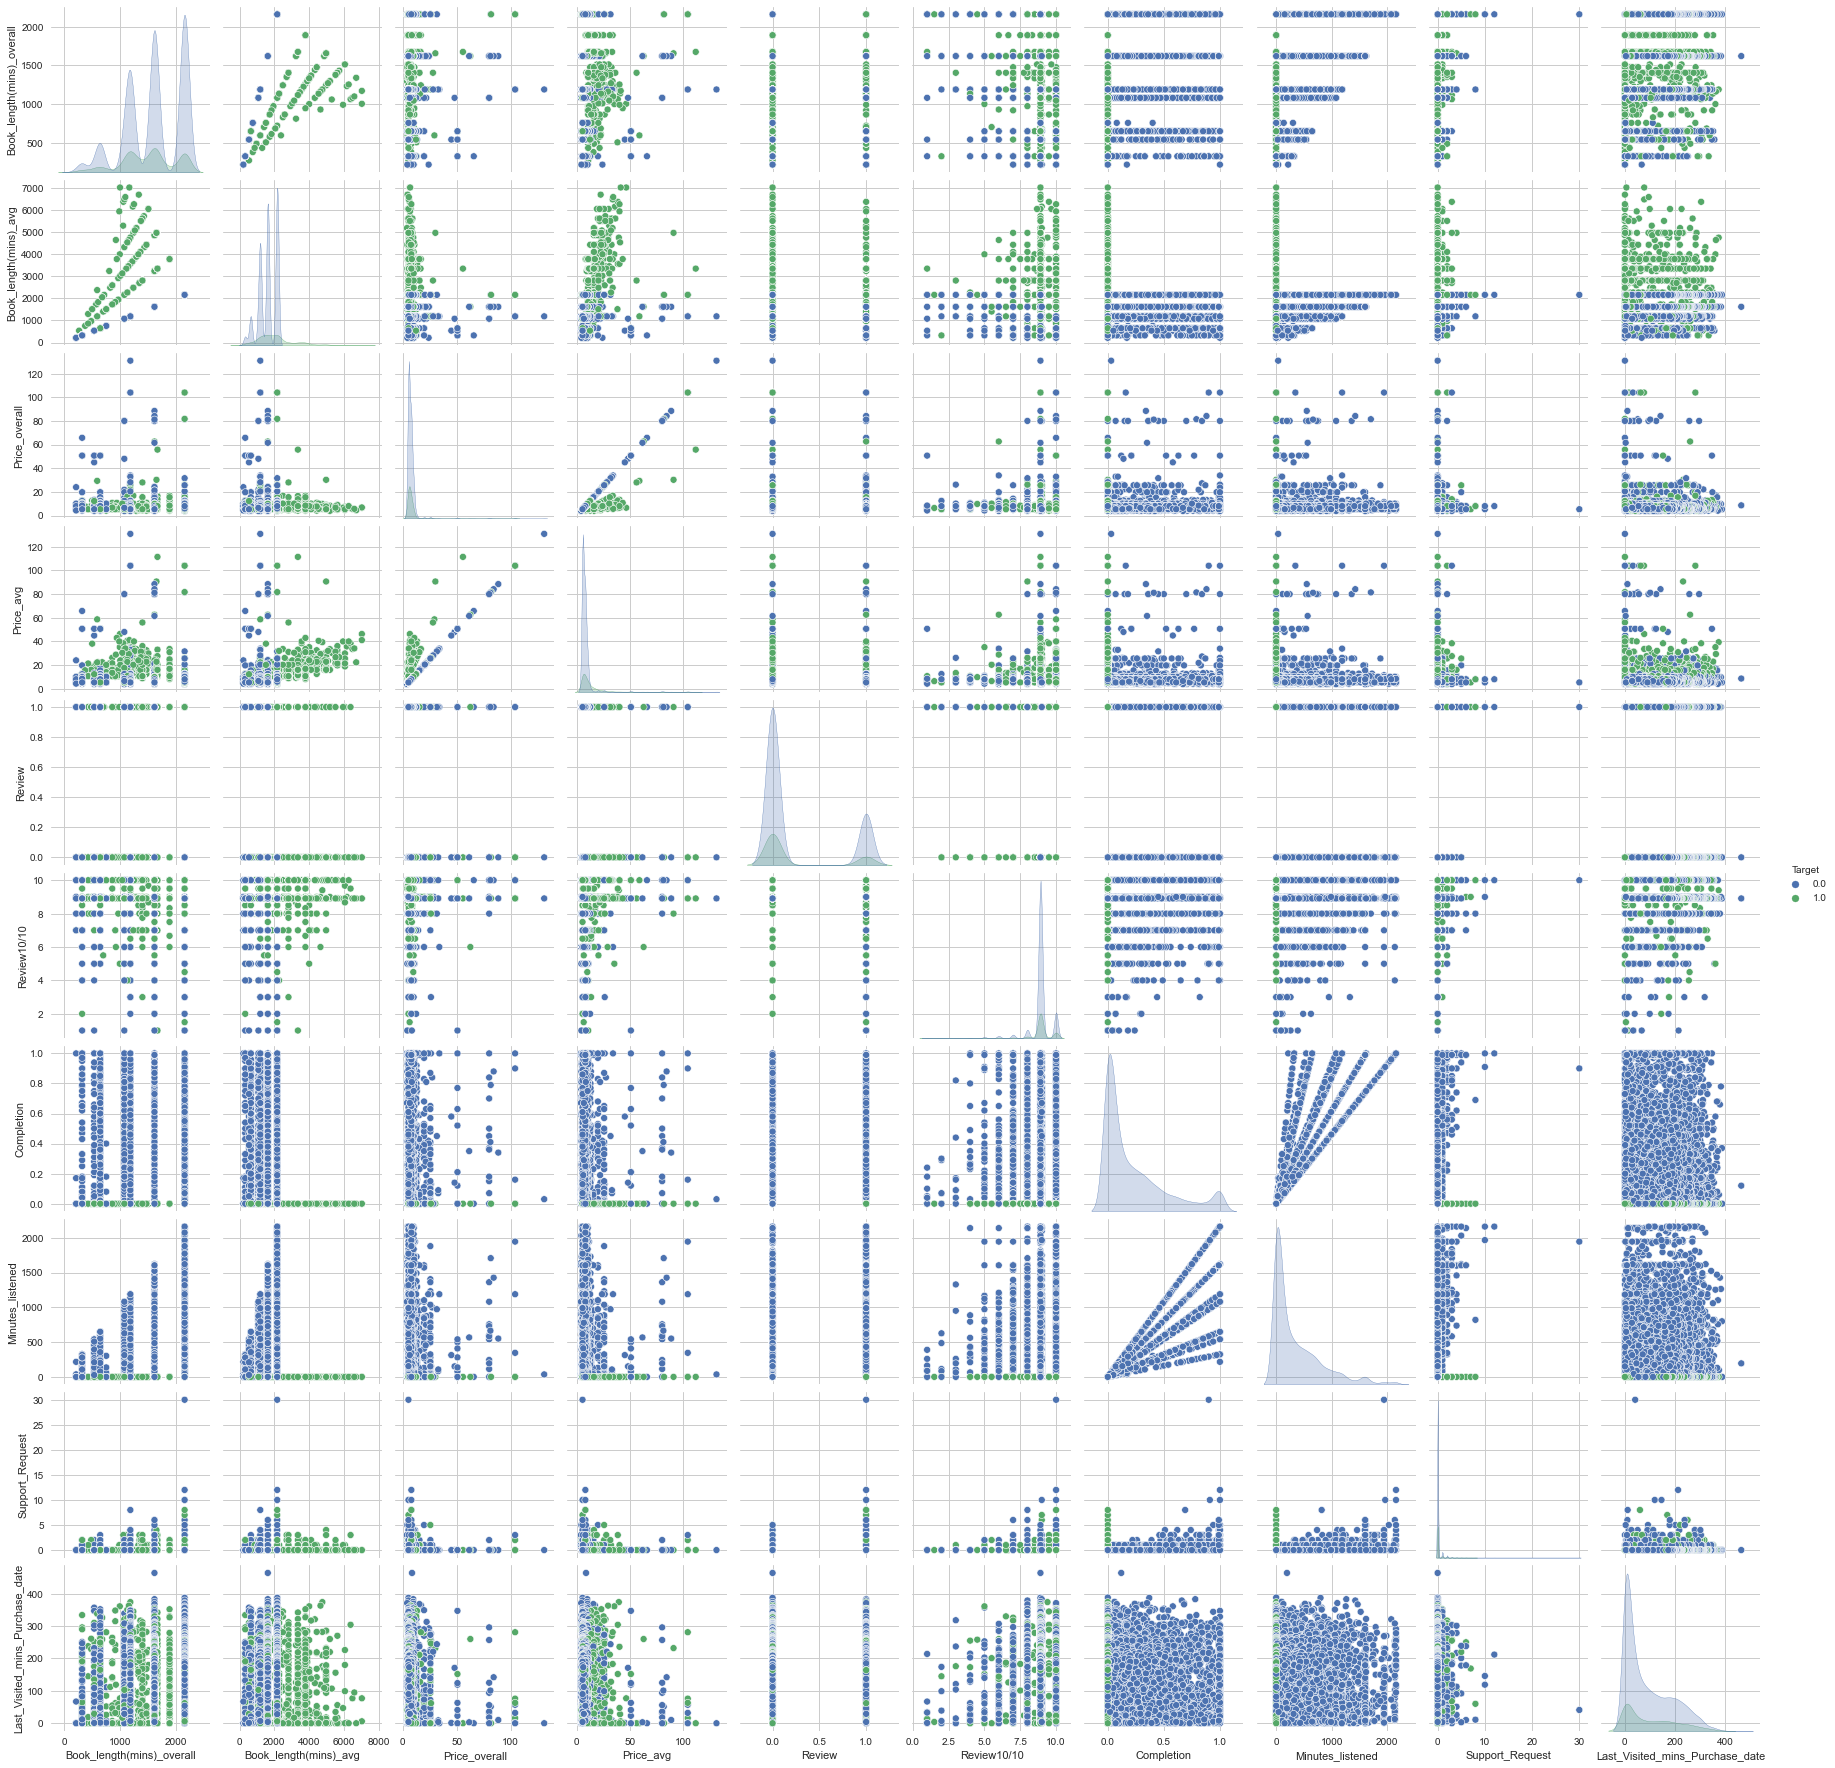

In [31]:
sns.pairplot(r_data.iloc[:,0:11],hue="Target")


# 4. Model Building

## 4. 1. Logistic Regression 

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)

(7480, 10)
(1870, 10)
(7480, 1)


#### Converting 2D dataframe 'y_train' into 1D array (expected during training)

In [33]:
print(y_train.shape)
y_arr = y_train.values
y_train = y_arr.flatten()
print(y_train.shape)


(7480, 1)
(7480,)


##### .values convert dataframe into ndArray | .flatten converts ndArray into 1D

In [34]:
print(y_train[5])

0.0


In [35]:

y_train.shape
sum1 = 0
sum0 = 0
for i in range(y_train.shape[0]):
    if(y_train[i]==1):
        sum1+=1
    else:
        sum0+=1

zeros = (sum0 / y_train.shape[0])
ones = (sum1 / y_train.shape[0])
print(sum1)
print(sum0)
print(f"Doesn't purchase again users Rate: {zeros * 100:.2f}%")
print(f"Purchase again users Rate: {ones * 100 :.2f}%")

1440
6040
Doesn't purchase again users Rate: 80.75%
Purchase again users Rate: 19.25%


In [36]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\ashwi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [37]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on training set: {:.2f}'.format(logreg.score(X_train, y_train)))
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on training set: 0.90
Accuracy of logistic regression classifier on test set: 0.89


### Accuracy of Logistic regression is 86.00%

### Probabilities of output(1) of each entry

In [56]:
predict_probability = logreg.predict_proba(X_test)


In [60]:
predict_probability[:,1]

array([4.46710556e-001, 7.69405832e-001, 3.66508283e-001, ...,
       1.10001885e-096, 2.68306743e-052, 1.02713862e-224])

In [80]:
logregProb = pd.DataFrame()


In [81]:
logregProb['Probability of getting output 1'] = predict_probability[:,1]
logregProb.head(20)

,Probability of getting output 1
0,0.45
1,0.77
2,0.37
3,0.27
4,0.00
5,1.00
6,0.00
7,0.33
8,0.00
9,0.00


## Confusion matrix

In [39]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[1498   10]
 [ 191  171]]


<AxesSubplot:>

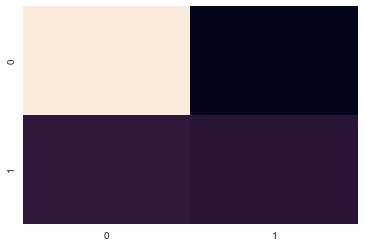

In [40]:
sns.heatmap(confusion_matrix,cbar=False)

In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.89      0.99      0.94      1508
         1.0       0.94      0.47      0.63       362

    accuracy                           0.89      1870
   macro avg       0.92      0.73      0.78      1870
weighted avg       0.90      0.89      0.88      1870



#### The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative.

#### The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

#### The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.
#### The F-beta score weights the recall more than the precision by a factor of beta. beta = 1.0 means recall and precision are equally important.

#### The support is the number of occurrences of each class in y_test.

## 4. 2 Support Vector Machine 

In [83]:
from sklearn.svm import SVC
svm_clf = SVC(probability=True)
svm_clf.fit(X_train, y_train)

SVC(probability=True)

In [43]:
y_predSVM = svm_clf.predict(X_test)
print('Accuracy of classifier on training set: {:.2f}'.format(logreg.score(X_train, y_train)))
print('Accuracy of Support Vector Machine classifier on test set: {:.2f}'.format(svm_clf.score(X_test, y_test)))

Accuracy of classifier on training set: 0.90
Accuracy of Support Vector Machine classifier on test set: 0.86


### Accuracy of SVM classification is 86.00%

### Probabilities of output(1) of each entry

In [85]:
prob = svm_clf.predict_proba(X_test)
prob

array([[5.33562460e-01, 4.66437540e-01],
       [6.64448088e-01, 3.35551912e-01],
       [6.43827132e-01, 3.56172868e-01],
       ...,
       [9.99997473e-01, 2.52733056e-06],
       [9.99475584e-01, 5.24415787e-04],
       [9.99999900e-01, 1.00000010e-07]])

In [86]:
SVMProb = pd.DataFrame()

SVMProb['Probability of getting output 1'] = predict_probability[:,1]
SVMProb.head(20)

,Probability of getting output 1
0,0.45
1,0.77
2,0.37
3,0.27
4,0.00
5,1.00
6,0.00
7,0.33
8,0.00
9,0.00


### Confusion matrix

In [44]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_predSVM)
print(confusion_matrix)

[[1508    0]
 [ 259  103]]


<AxesSubplot:>

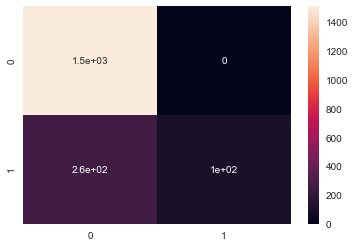

In [45]:
sns.heatmap(confusion_matrix,annot=True)


In [46]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predSVM))

              precision    recall  f1-score   support

         0.0       0.85      1.00      0.92      1508
         1.0       1.00      0.28      0.44       362

    accuracy                           0.86      1870
   macro avg       0.93      0.64      0.68      1870
weighted avg       0.88      0.86      0.83      1870



## 4. 3 Decision tree

In [47]:
from sklearn.tree import DecisionTreeClassifier
DTclf_model = DecisionTreeClassifier(criterion="gini", random_state=1,max_depth=5, min_samples_leaf=1)   
DTclf_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=1)

In [48]:
y_predDT = DTclf_model.predict(X_test)
print('Accuracy of classifier on training set: {:.2f}'.format(logreg.score(X_train, y_train)))
print('Accuracy of Decision tree classifier on test set: {:.2f}'.format(DTclf_model.score(X_test, y_test)))

Accuracy of classifier on training set: 0.90
Accuracy of Decision tree classifier on test set: 0.90


### Accuracy of Decision tree classification is 90.00%

### Confusion matrix

In [49]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_predDT)
print(confusion_matrix)

[[1508    0]
 [ 183  179]]


<AxesSubplot:>

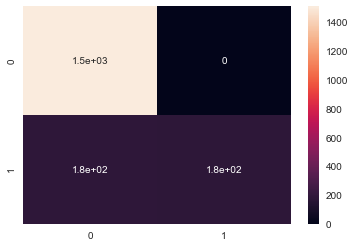

In [50]:
sns.heatmap(confusion_matrix,annot=True)


In [51]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predDT))

              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94      1508
         1.0       1.00      0.49      0.66       362

    accuracy                           0.90      1870
   macro avg       0.95      0.75      0.80      1870
weighted avg       0.91      0.90      0.89      1870



## 4.3.1 XG Boost 

In [52]:


from xgboost import XGBClassifier
xgb_clf = XGBClassifier(learning_rate=0.5, n_estimators=150, base_score=0.5)
xgb_clf.fit(X_train, y_train)
y_predXG = xgb_clf.predict(X_test)
print('Accuracy of classifier on training set: {:.2f}'.format(logreg.score(X_train, y_train)))
print('Accuracy of Extreme Gradient Boosting classifier on test set: {:.2f}'.format(xgb_clf.score(X_test, y_test)))


ModuleNotFoundError: No module named 'xgboost'

### Accuracy of Decision tree classification is 88.00%

### Confusion matrix

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_predXG)
print(confusion_matrix)

In [ ]:
sns.heatmap(confusion_matrix,annot=True)


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predXG))

## 4. 4 Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=1500, oob_score=True)
rf_clf.fit(X_train, y_train)

In [ ]:
y_predRF = rf_clf.predict(X_test)
print('Accuracy of Random Forest classifier on training set: {:.2f}'.format(rf_clf.score(X_train, y_train)))

print('Accuracy of Random Forest classifier on test set: {:.2f}'.format(rf_clf.score(X_test, y_test)))

### We Doesn't want our Model to be Overfitted 
#### so We Limit the number of trees that will gonna update our model

#### Also Finding the optimal depth of Tree to split each node to a desired number of observations

In [ ]:
rf_clf = RandomForestClassifier(n_estimators=1500, oob_score=True,max_depth=5)
rf_clf.fit(X_train, y_train)
y_predRF = rf_clf.predict(X_test)
print('Accuracy of Random Forest classifier on training set: {:.2f}'.format(rf_clf.score(X_train, y_train)))

print('Accuracy of Random Forest classifier on test set: {:.2f}'.format(rf_clf.score(X_test, y_test)))

### Accuracy of Random Forest is 90.00%

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_predRF)
print(confusion_matrix)

In [ ]:
sns.heatmap(confusion_matrix,cbar=False)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predRF))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = { 
    'n_estimators': [200, 700],
    'max_features': ['auto', 'sqrt', 'log2']
}

rf_clf = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv= 5, verbose = 2)
rf_clf.fit(X_train, y_train)

# print best parameter after tuning
print(rf_clf.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(rf_clf.best_estimator_)

In [ ]:
y_predRF = rf_clf.predict(X_test)
print('Accuracy of Random Forest classifier on training set: {:.2f}'.format(rf_clf.score(X_train, y_train)))
print('Accuracy of Random Forest classifier on test set: {:.2f}'.format(rf_clf.score(X_test, y_test)))

In [ ]:
print(classification_report(y_test, y_predRF))

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

In [ ]:
params = {
    "n_estimators": [100, 200, 300, 400],
    "max_depth": (1, 9),
    "criterion": ["gini", "entropy"],
}

In [ ]:
from skopt import BayesSearchCV

search = BayesSearchCV(
    estimator=rf_clf,
    search_spaces=params,
    n_jobs=1,
    cv=5,
    n_iter=30,
    scoring="accuracy",
    verbose=4,
    random_state=42
)

In [ ]:
search.fit(X_scaled,y_train)

In [ ]:
print(search.best_score_)
print(search.best_params_)

In [ ]:
print(search.score(X_test, y_test))

In [ ]:
y_predRF = search.predict(X_test)
print('Accuracy of Random Forest classifier on training set: {:.2f}'.format(search.score(X_train, y_train)))
print('Accuracy of Random Forest classifier on test set: {:.2f}'.format(search.score(X_test, y_test)))

In [ ]:
print(classification_report(y_test, y_predRF))

In [ ]:
#Ba

In [ ]:
# from skopt import BayesSearchCV
# # parameter ranges are specified by one of below
# #pip install scikit_optimize
# from skopt.space import Real, Categorical, Integer 
# from sklearn.svm import SVC

# # log-uniform: understand as search over p = exp(x) by varying x
# byS = BayesSearchCV(
#     SVC(),
#     {
#         'C': Real(1e-6, 1e+6, prior='log-uniform'),
#         'gamma': Real(1e-6, 1e+1, prior='log-uniform'),
#         'degree': Integer(1,8)
        
#     },
#     n_iter=32,
#     random_state=0,
#     cv=5,
#     verbose=3
# )



In [ ]:
# executes bayesian optimization
# byS.fit(X_train, y_train)

In [ ]:
# model can be saved, used for predictions or scoring
print(opt.score(X_test, y_test))



## 4.5 K Nearest neighbour classification

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_clf.fit(X_train, y_train)

In [ ]:
y_predKNN = knn_clf.predict(X_test)
print('Accuracy of KNN classifier on test set: {:.2f}'.format(knn_clf.score(X_test, y_test)))

### Accuracy of KNN classifier is 86.00%

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_predKNN)
print(confusion_matrix)

#### Correct predictions    : 2120  +   277  = 2397
#### Incorrect predictions :  261   +   147  =  408

In [ ]:
sns.heatmap(confusion_matrix,annot=True)


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predKNN))

## Comparing Machine Learning Models

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


ml_models = {
    'Logistic Regression': logreg, 
    'Random Forest': rf_clf, 
    'XGboost': xgb_clf,
    'Decision Tree':DTclf_model,
    'KNN': knn_clf,
    'SVM': svm_clf
}

In [ ]:
plt.figure(figsize=(12,6))

for model in ml_models:
    print(f"{model.upper()} ACCURACY: {ml_models[model].score(X_test,y_test):.3f}")
    plt.bar(model.upper(),ml_models[model].score(X_test,y_test),label=model.upper(),align="edge")
plt.title("ML Model Comparision Based On Accuracy",fontsize=20)
plt.xlabel("MODELS",fontsize=20)
plt.xticks(rotation=90,ha='right')
plt.ylabel("(ACCURACY)SCORE",fontsize=20)
plt.legend(bbox_to_anchor =(0.75, 1.15), ncol = 2,loc ="right")
plt.show()


In [ ]:
plt.figure(figsize=(12,6))

for model in ml_models:
    print(f"{model.upper()} roc_auc_score: {roc_auc_score(y_test, ml_models[model].predict(X_test)):.3f}")
    plt.bar(model.upper(),roc_auc_score(y_test, ml_models[model].predict(X_test)),label=model.upper(),align="edge")
plt.title("ML Model Comparision based on AUC Score",fontsize=20)
plt.xlabel("MODELS",fontsize=20)
plt.xticks(rotation=90,ha='right')
plt.ylabel("ROC AUC SCORE(Area under the ROC Curve)",fontsize=20)
plt.legend(bbox_to_anchor =(0.75, 1.15), ncol = 2,loc ="right")
plt.show()


## ROC Curve (Receiver Operating Characteristic Curve)

In [ ]:
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [ ]:
#Logisitic Regression
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

plt.plot(fpr,tpr)
plt.ylabel('Sensitivity')  #True Positive Rate
plt.xlabel('1-Specificity')  #False Positive Rate
plt.show()

In [ ]:
#Decision Tree
y_pred_proba = DTclf_model.predict_proba(X_test)[::,1]
fpr1, tpr1, _ = metrics.roc_curve(y_test,  y_pred_proba)

plt.plot(fpr1,tpr1)
plt.ylabel('Sensitivity')  #True Positive Rate
plt.xlabel('1-Specificity')  #False Positive Rate
plt.show()

In [ ]:
#XGBOOST
y_pred_proba = xgb_clf.predict_proba(X_test)[::,1]
fpr2, tpr2, _ = metrics.roc_curve(y_test,  y_pred_proba)

plt.plot(fpr2,tpr2)
plt.ylabel('Sensitivity')  #True Positive Rate
plt.xlabel('1-Specificity')  #False Positive Rate
plt.show()

In [ ]:
#Random Forest
y_pred_proba = rf_clf.predict_proba(X_test)[::,1]
fpr3, tpr3, _ = metrics.roc_curve(y_test,  y_pred_proba)

plt.plot(fpr3,tpr3)
plt.ylabel('Sensitivity')  #True Positive Rate
plt.xlabel('1-Specificity')  #False Positive Rate
plt.show()

In [ ]:
plt.plot(fpr, tpr, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr1, tpr1, linestyle='--',color='red', label='Decision Tree')
plt.plot(fpr2, tpr2, linestyle='--',color='yellow', label='XGBOOST')
plt.plot(fpr3, tpr3, linestyle='--',color='blue', label='Random Forest')

plt.plot(p_fpr, p_tpr, linestyle='--', color='purple')
plt.title('ROC curve') #Receiver Operating Characteristic Curve
plt.xlabel('1-Specificity') #False Positive Rate
plt.ylabel('Sensitivity')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();